# Supervised Learning Project 

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, **you need an F1 score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.**

**Project instructions:**
- Download and prepare the data. Explain the procedure.
- Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.
- Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.
- Perform the final testing.

**Data description**
- RowNumber — data string index
- CustomerId — unique customer identifier
- Surname — surname
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — period of maturation for a customer’s fixed deposit (years)
- Balance — account balance
- NumOfProducts — number of banking products used by the customer
- HasCrCard — customer has a credit card
- IsActiveMember — customer’s activeness
- EstimatedSalary — estimated salary
- Exited — сustomer has left

**Project evaluation**
- How did you prepare the data for training? Have you processed all of the feature types?
- Have you explained the preprocessing steps well enough?
- How did you investigate the balance of classes?
- Did you study the model without taking into account the imbalance of classes?
- What are your findings about the task research?
- Have you correctly split the data into sets?
- How have you worked with the imbalance of classes?
- Did you use at least two techniques for imbalance fixing?
- Have you performed the model training, validation, and final testing correctly?
- How high is your F1 score?
- Did you examine the AUC-ROC values?
- Have you kept to the project structure and kept the code neat?

### Data Preprocessing and EDA
- This is a classification task (churn / not churn)
- We have a bunch of categorical columns (i.e. gender, geography, etc.) and numeric ones 
- There are some irrelevant columns we will not feed the model (RowNumber, CustomerId)
- We'll need to fill in missing data in the Tenure column

**Data to Fix:**
- Nulls in Tenure column, figure out why, fill in with 0's perhaps 
- Can drop surname, irrelevant 
- RowNumber is just the index, can drop
- Will keep CustomerId as a unique user identifier (we don't need it for this project, but would be a best practice)
- Can transform Gender and Geography 

In [4]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st

# Preprocessing modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

# Classification models
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [2]:
# Load the data

df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [5]:
# Drop unneeded columns

df = df.drop(['RowNumber', 'Surname'], axis=1)

In [6]:
# Checking cardinality of categorical data

df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
# looking into missing tenure data

df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [11]:
df['Tenure'].isna().sum()

909

In [12]:
# Stats look pretty similar, assuming NaN is the same as 0 for Tenure.
# Perhaps 0 means customers had a fixed deposit but it matured, leaving them without a FD, the same as NaN

display(df.query('Tenure.isna()').describe())

display(df.query('Tenure == 0').describe())

display(df.describe())

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.090000e+02,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,1.568981e+07,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,7.511225e+04,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,1.556581e+07,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,1.562658e+07,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,1.568687e+07,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,1.575680e+07,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,1.581569e+07,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,3.820000e+02,382.000000,382.000000,382.0,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,1.569618e+07,651.913613,39.306283,0.0,80135.307277,1.437173,0.651832,0.531414,99565.395157,0.235602
std,7.187497e+04,95.741781,10.418181,0.0,62233.212461,0.522442,0.477014,0.499667,57360.554103,0.424931
min,1.556647e+07,350.000000,19.000000,0.0,0.000000,1.000000,0.000000,0.000000,332.810000,0.000000
25%,1.563546e+07,592.250000,32.000000,0.0,0.000000,1.000000,0.000000,0.000000,47574.687500,0.000000
50%,1.569641e+07,653.000000,38.000000,0.0,101050.445000,1.000000,1.000000,1.000000,102160.510000,0.000000
75%,1.575880e+07,714.750000,44.750000,0.0,129638.762500,2.000000,1.000000,1.000000,149577.825000,0.000000
max,1.581553e+07,850.000000,79.000000,0.0,197041.800000,3.000000,1.000000,1.000000,199478.050000,1.000000


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# Replace NaNs with 0

df['Tenure'] = df['Tenure'].fillna(0)

In [14]:
# Transform Gender using OHE, since there's only 2 we just keep one dummy and it'll work for any model  

df = pd.get_dummies(data=df, columns=['Gender'], drop_first=True)
df = df.rename(columns={'Gender_Male':'Male'})

In [15]:
# Geography can use label encoding, since order doesn't matter

encoder = LabelEncoder()
df['GeoLabel'] = pd.DataFrame(encoder.fit_transform(df['Geography']), columns=['Geography'])

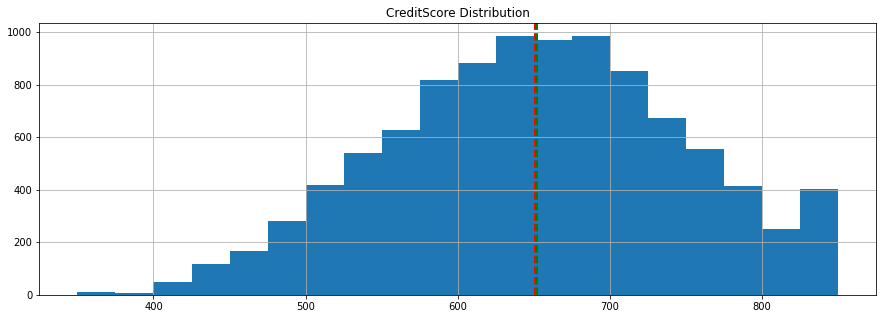

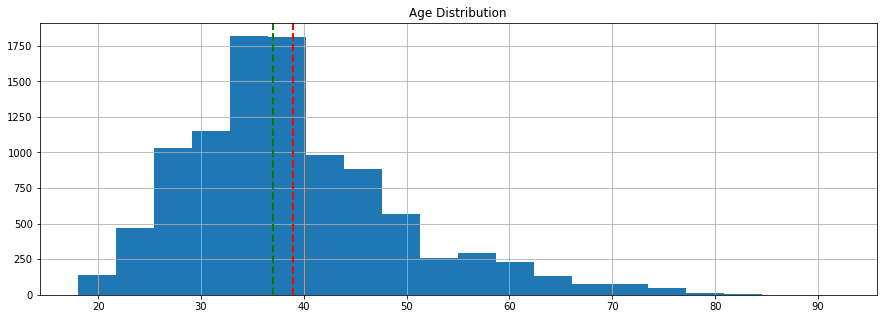

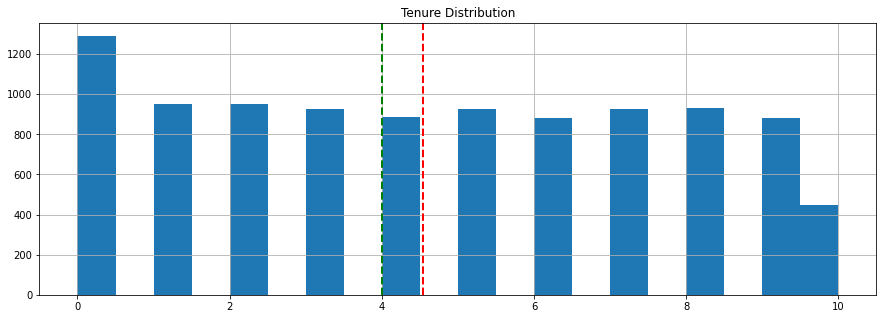

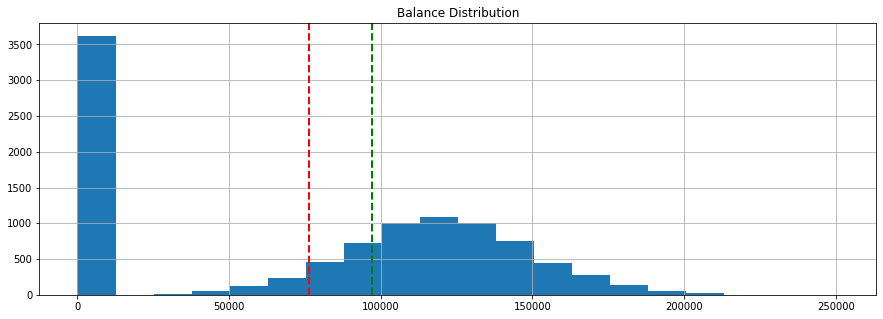

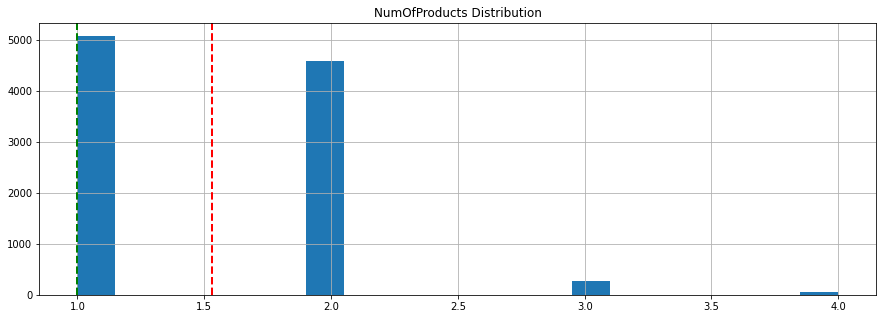

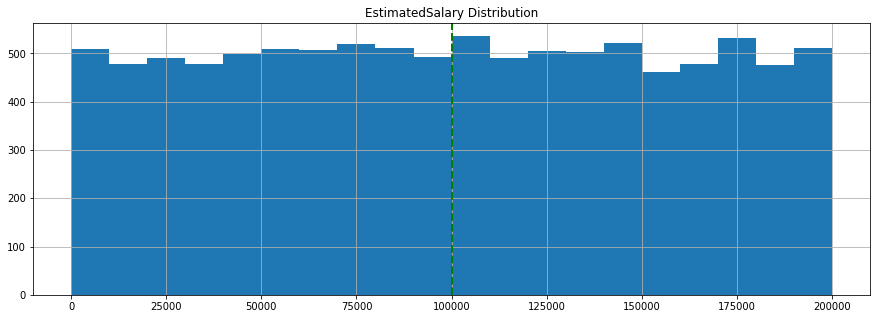

In [16]:
# Take a look at distribution of the numerical columns

num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in num_cols:
    df[col].hist(bins=20, figsize=[15,5])
    mean_value = df[col].mean()
    median_value = df[col].median()
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2)
    plt.axvline(median_value, color='green', linestyle='--', linewidth=2)
    plt.title(f'{col} Distribution')
    plt.show()

**Observations:**
- This is going to be a classification problem since the target is a binary yes/no 1/0
    - We can use Logistic Regression, Decision Trees, and Random Forest
    - We will need to scale the numeric columns in num_cols since the scales are very different as seen in the describe() tables
- We will likely have to upsample the amount of exited users to balance classes later on (0/1 is a 80/20 split roughly)
- Distributions of the features vary, some uniform, left skew, normal, bimodal

### Initial Modeling
- In this section we will split the data, and model it without adjusting for class imbalances
- Will use the classification models: Logistic Regression, Decision Tree and Random Forest
- Used stratified splits. Non-stratified models did not product a 59% F1

In [17]:
random_state=12345

X = df.drop(['Exited', 'CustomerId', 'Geography'], axis=1)
y = df['Exited']

X_train, X_rest, y_train, y_rest = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4, 
                                                    random_state=random_state,
                                                    stratify=y
                                                   )

X_valid, X_test, y_valid, y_test = train_test_split(X_rest, 
                                                    y_rest, 
                                                    test_size=0.5, 
                                                    random_state=random_state,
                                                    stratify=y_rest
                                                   )

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(6000, 10)
(2000, 10)
(2000, 10)

(6000,)
(2000,)
(2000,)


In [18]:
# Scale all the numeric columns

pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train.loc[:, num_cols] = scaler.transform(X_train[num_cols])
X_valid.loc[:, num_cols] = scaler.transform(X_valid[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])

In [19]:
def print_eval_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print('Accuracy:', f'{accuracy:.1%}')
    print('Recall:', f'{recall:.1%}')
    print('Precision:', f'{precision:.1%}')
    print('F1 Score:', f'{f1:.1%}')    

In [20]:
def auc_score(model, features, target):
    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]
    auc_score = roc_auc_score(target, probabilities_one)
    print(auc_score)

In [21]:
def print_results_distribution(y_pred):
    num = pd.Series(y_pred).value_counts()
    pct = pd.Series(y_pred).value_counts(normalize=True)
    print(pd.concat([num, pct], axis=1))

In [22]:
def print_all_results(model, features, target, predictions):
    print('Model Scores:')
    print_eval_metrics(target, predictions)
    print()
    print('Prediction Distribution:')
    print_results_distribution(predictions)
    print()
    print('AUC Score:')
    auc_score(model, features, target)
    print()
    print('Confusion Matrix:')
    print(confusion_matrix(target, predictions))

In [23]:
# Baseline modeling without up/down sampling

model0 = LogisticRegression(random_state=random_state)
model0.fit(X_train, y_train)

model0_train_y = model0.predict(X_train)

print('Training Set Results:')
print()
print_all_results(model0, X_train, y_train, model0_train_y)

Training Set Results:

Model Scores:
Accuracy: 81.2%
Recall: 18.6%
Precision: 63.6%
F1 Score: 28.8%

Prediction Distribution:
      0       1
0  5643  0.9405
1   357  0.0595

AUC Score:
0.7516680037186259

Confusion Matrix:
[[4648  130]
 [ 995  227]]


In [24]:
model0_valid_y = model0.predict(X_valid)

print('Validation Set Results:')
print()
print_all_results(model0, X_valid, y_valid, model0_valid_y)

Validation Set Results:

Model Scores:
Accuracy: 80.2%
Recall: 15.7%
Precision: 54.7%
F1 Score: 24.4%

Prediction Distribution:
      0       1
0  1883  0.9415
1   117  0.0585

AUC Score:
0.7737615774953197

Confusion Matrix:
[[1539   53]
 [ 344   64]]


**Logistic Regression:** 
- The model is massively underpredicting churns, way more than the actual data
- The F1 score is also really low, mostly due to recall since the model is underpredicting churns
- AUC score is fairly high at 75% for the validation set

In [25]:
# iterate to find the best depth 

best_tree_result = 0
best_tree_depth = 0

for i in range(1, 11):
    model = DecisionTreeClassifier(random_state=random_state, max_depth=i)
    model.fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
    print(i, 'max depth accuracy:', f'{score:.1%}')
    if score > best_tree_result:
        best_tree_result = score
        best_tree_depth = i

print("Accuracy of the best model:", f'{best_tree_result:.1%}')
print("Depth of the best model:", best_tree_depth)

1 max depth accuracy: 79.6%
2 max depth accuracy: 83.5%
3 max depth accuracy: 84.0%
4 max depth accuracy: 84.9%
5 max depth accuracy: 85.7%
6 max depth accuracy: 85.6%
7 max depth accuracy: 85.7%
8 max depth accuracy: 85.8%
9 max depth accuracy: 85.0%
10 max depth accuracy: 84.4%
Accuracy of the best model: 85.8%
Depth of the best model: 8


In [26]:
# Call and run the Decision Tree model

model1 = DecisionTreeClassifier(random_state=random_state, max_depth=best_tree_depth)
model1.fit(X_train, y_train)

model1_train_y = model1.predict(X_train)

print('Training Set Results:')
print()
print_all_results(model1, X_train, y_train, model1_train_y)

Training Set Results:

Model Scores:
Accuracy: 87.7%
Recall: 51.9%
Precision: 81.1%
F1 Score: 63.3%

Prediction Distribution:
      0         1
0  5218  0.869667
1   782  0.130333

AUC Score:
0.8918817082385923

Confusion Matrix:
[[4630  148]
 [ 588  634]]


In [27]:
model1_valid_y = model1.predict(X_valid)

print('Validation Set Results:')
print()
print_all_results(model1, X_valid, y_valid, model1_valid_y)

Validation Set Results:

Model Scores:
Accuracy: 85.8%
Recall: 50.7%
Precision: 71.1%
F1 Score: 59.2%

Prediction Distribution:
      0       1
0  1709  0.8545
1   291  0.1455

AUC Score:
0.8061685572470194

Confusion Matrix:
[[1508   84]
 [ 201  207]]


**Decision Tree:** 
- This model is still underpredicting churns, though it does better than Log Regression and has a better F1
- Recall and F1 are better than the baseline Log Regression model, but still low 
- Score of validation set is similar to training 
- AUC score is higher than the baseline model at 82%

In [28]:
# Iterative loop to find ideal n_estimators and max_depth

best_result = 0
best_est = 0
best_depth = 0

for i in range(1, 11):
    for n in range(1, 11):
        model = RandomForestClassifier(random_state=random_state, n_estimators=i, max_depth=n)
        model.fit(X_train, y_train)
        score = model.score(X_valid, y_valid)
        if score > best_result:
            best_result = score
            best_est = i
            best_depth = n

print("Accuracy of the best model:", f'{best_result:.1%}')
print("Estimators in the best model:", best_est)
print("Depth of the best model:", best_depth)

Accuracy of the best model: 86.4%
Estimators in the best model: 10
Depth of the best model: 9


In [29]:
# Random Forest on unadjusted training data

model2 = RandomForestClassifier(random_state=random_state, n_estimators=best_est)
model2.fit(X_train, y_train)

model2_train_y = model2.predict(X_train)

print('Training Set Results:')
print()
print_all_results(model2, X_train, y_train, model2_train_y)

Training Set Results:

Model Scores:
Accuracy: 98.3%
Recall: 92.0%
Precision: 99.6%
F1 Score: 95.7%

Prediction Distribution:
      0      1
0  4872  0.812
1  1128  0.188

AUC Score:
0.9994105724614796

Confusion Matrix:
[[4774    4]
 [  98 1124]]


**Random Forest Training Results:**
- These results look pretty good, but it could be overfit. Let's test it on a validation set. 

In [30]:
model2_valid_y = model2.predict(X_valid)

print('Validation Set Results:')
print()
print_all_results(model2, X_valid, y_valid, model2_valid_y)

Validation Set Results:

Model Scores:
Accuracy: 85.5%
Recall: 47.1%
Precision: 72.5%
F1 Score: 57.1%

Prediction Distribution:
      0       1
0  1735  0.8675
1   265  0.1325

AUC Score:
0.829912429796039

Confusion Matrix:
[[1519   73]
 [ 216  192]]


**Random Forest Validation Results:**
- The validation set did much worse espectially in terms of recall
- This suggests that the model was overfit
- AUC was near 1 in the training and came down to 81% for the validation set 

In [31]:
# Using GridSearchCV to do the same parameter tuning 

param_grid = {
    'n_estimators': np.arange(1,11,1),
    'max_depth': np.arange(1,11,1),
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=random_state, n_estimators=i, max_depth=n)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best Params:', best_params)
print('Best Score', best_score)

Best Params: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}
Best Score 0.8603999999999999


In [32]:
# Refitting model 2 to see if these parameters do better (increased max depth from 7 to 10)

model2b = RandomForestClassifier(**best_params, random_state=random_state)
model2b.fit(X_train, y_train)

model2b_train_y = model2b.predict(X_train)

print('Training Set Results:')
print()
print_all_results(model2b, X_train, y_train, model2b_train_y)

Training Set Results:

Model Scores:
Accuracy: 90.4%
Recall: 56.3%
Precision: 94.1%
F1 Score: 70.5%

Prediction Distribution:
      0         1
0  5269  0.878167
1   731  0.121833

AUC Score:
0.948868038794831

Confusion Matrix:
[[4735   43]
 [ 534  688]]


In [33]:
model2b_valid_y = model2b.predict(X_valid)

print('Validation Set Results:')
print()
print_all_results(model2b, X_valid, y_valid, model2b_valid_y)

Validation Set Results:

Model Scores:
Accuracy: 85.7%
Recall: 44.6%
Precision: 75.2%
F1 Score: 56.0%

Prediction Distribution:
      0      1
0  1758  0.879
1   242  0.121

AUC Score:
0.8571926729234407

Confusion Matrix:
[[1532   60]
 [ 226  182]]


**Random Forest - Adjusted Parameters:** 
- Is pretty close to actual distribution and accuracy and F1 were high in the training set 
- Using the GridSearchCV params makes the scores slightly better 
- Will use model2b best_params for Random Forest

In [34]:
# Comparing scores from all three models

model_dict = {
    'model0_valid_y': 'Log Regression',
    'model1_valid_y': 'Decision Tree',
    'model2b_valid_y': 'Random Forest'
}

auc_dict = {
    'model0_valid_y': 'model0',
    'model1_valid_y': 'model1',
    'model2b_valid_y': 'model2b'
}

predictions = ['model0_valid_y', 'model1_valid_y', 'model2b_valid_y']
    
score_df = pd.DataFrame()
score_df['Metrics'] = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'AUC-ROC Score']

for prediction in predictions:
    model_name = model_dict[prediction]
    accuracy = f'{accuracy_score(y_valid, eval(prediction)):.0%}'
    recall = f'{recall_score(y_valid, eval(prediction)):.0%}'
    precision = f'{precision_score(y_valid, eval(prediction)):.0%}'
    f1 = f'{f1_score(y_valid, eval(prediction)):.0%}'
    auc = f'{roc_auc_score(y_valid, eval(auc_dict[prediction]).predict_proba(X_valid)[:, 1]):.0%}'
    metrics = [accuracy, recall, precision, f1, auc]
    score_df[model_name] = metrics
    
score_df = score_df.reset_index(drop=True)
score_df = score_df.style.highlight_max().hide_index()
score_df

Metrics,Log Regression,Decision Tree,Random Forest
Accuracy,80%,86%,86%
Recall,16%,51%,45%
Precision,55%,71%,75%
F1 Score,24%,59%,56%
AUC-ROC Score,77%,81%,86%


**Final Observations:**
- Random Forest performs the best out of all the metrics on the validation set
- Decision tree also performs similarly but slightly worse
- F1 score for random forest is still below 59%

### Imbalance Adjusted Modeling - Class Weight Balancing
- In this section we will adjust the class imbalance
    - Using class_weight='balanced' for the Log Regression
    - Upsample churns

In [35]:
# Baseline model with class balancing param

model0_bal = LogisticRegression(random_state=random_state, class_weight='balanced')
model0_bal.fit(X_train, y_train)

model0_bal_train_y = model0_bal.predict(X_train)
model0_bal_valid_y = model0_bal.predict(X_valid)

print('Training Set Results:')
print()
print_all_results(model0_bal, X_train, y_train, model0_bal_train_y)

print()
print()

print('Validation Set Results:')
print()
print_all_results(model0_bal, X_valid, y_valid, model0_bal_valid_y)

Training Set Results:

Model Scores:
Accuracy: 70.0%
Recall: 67.4%
Precision: 37.0%
F1 Score: 47.8%

Prediction Distribution:
      0       1
0  3771  0.6285
1  2229  0.3715

AUC Score:
0.755289861675067

Confusion Matrix:
[[3373 1405]
 [ 398  824]]


Validation Set Results:

Model Scores:
Accuracy: 71.3%
Recall: 72.3%
Precision: 39.0%
F1 Score: 50.7%

Prediction Distribution:
      0      1
0  1244  0.622
1   756  0.378

AUC Score:
0.780475601044438

Confusion Matrix:
[[1131  461]
 [ 113  295]]


**Logistic Regression - Balanced Class Weights:**
- The balanced class weight model trades off some accuracy and a lot of precision for a higher recall score
- It has the opposite problem now, where it is overpredicting churns

In [36]:
# Baseline model with class balancing param

model1_bal = DecisionTreeClassifier(random_state=random_state, max_depth=best_tree_depth, class_weight='balanced')
model1_bal.fit(X_train, y_train)

model1_bal_train_y = model1_bal.predict(X_train)
model1_bal_valid_y = model1_bal.predict(X_valid)

print('Training Set Results:')
print()
print_all_results(model1_bal, X_train, y_train, model1_bal_train_y)

print()
print()

print('Validation Set Results:')
print()
print_all_results(model1_bal, X_valid, y_valid, model1_bal_valid_y)

Training Set Results:

Model Scores:
Accuracy: 80.3%
Recall: 84.6%
Precision: 50.9%
F1 Score: 63.6%

Prediction Distribution:
      0         1
0  3970  0.661667
1  2030  0.338333

AUC Score:
0.9080443371453587

Confusion Matrix:
[[3782  996]
 [ 188 1034]]


Validation Set Results:

Model Scores:
Accuracy: 75.5%
Recall: 74.3%
Precision: 44.0%
F1 Score: 55.3%

Prediction Distribution:
      0      1
0  1312  0.656
1   688  0.344

AUC Score:
0.8037352818011627

Confusion Matrix:
[[1207  385]
 [ 105  303]]


**Decision Tree - Balanced Class Weights:**
- The model only slightly outperforms the baseline log regression
- Has a much higher recall due to overpredicting churns, but lower precision as a result 
- From a business perspective, it might be worth the cost to have higher recall and lower precision to keep customers (might be worth the cost of some unneeded retention incentives if we still increase the number of retentions)

In [37]:
# Baseline model with class balancing param

model2_bal = RandomForestClassifier(**best_params, random_state=random_state, class_weight='balanced')
model2_bal.fit(X_train, y_train)

model2_bal_train_y = model2_bal.predict(X_train)
model2_bal_valid_y = model2_bal.predict(X_valid)

print('Training Set Results:')
print()
print_all_results(model2_bal, X_train, y_train, model2_bal_train_y)

print()
print()

print('Validation Set Results:')
print()
print_all_results(model2_bal, X_valid, y_valid, model2_bal_valid_y)

Training Set Results:

Model Scores:
Accuracy: 89.4%
Recall: 81.6%
Precision: 70.9%
F1 Score: 75.9%

Prediction Distribution:
      0         1
0  4594  0.765667
1  1406  0.234333

AUC Score:
0.9529179874479252

Confusion Matrix:
[[4369  409]
 [ 225  997]]


Validation Set Results:

Model Scores:
Accuracy: 83.8%
Recall: 67.6%
Precision: 59.0%
F1 Score: 63.0%

Prediction Distribution:
      0      1
0  1532  0.766
1   468  0.234

AUC Score:
0.8565298921075968

Confusion Matrix:
[[1400  192]
 [ 132  276]]


**Random Forest - Balanced Class Weights:**
- This model seems to perform the best so far
- All scores except recall outperform the baseline model 
- F1 is close to 59% threshold

In [38]:
# Comparing scores from all three models

model_dict = {
    'model0_bal_valid_y': 'Log Regression',
    'model1_bal_valid_y': 'Decision Tree',
    'model2_bal_valid_y': 'Random Forest'
}

auc_dict = {
    'model0_bal_valid_y': 'model0_bal',
    'model1_bal_valid_y': 'model1_bal',
    'model2_bal_valid_y': 'model2_bal'
}

train_predictions = ['model0_bal_valid_y', 'model1_bal_valid_y', 'model2_bal_valid_y']
    
bal_score_df = pd.DataFrame()
bal_score_df['Metrics'] = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'AUC-ROC Score']

for prediction in train_predictions:
    model_name = model_dict[prediction]
    accuracy = f'{accuracy_score(y_valid, eval(prediction)):.0%}'
    recall = f'{recall_score(y_valid, eval(prediction)):.0%}'
    precision = f'{precision_score(y_valid, eval(prediction)):.0%}'
    f1 = f'{f1_score(y_valid, eval(prediction)):.0%}'
    auc = f'{roc_auc_score(y_valid, eval(auc_dict[prediction]).predict_proba(X_valid)[:, 1]):.0%}'
    metrics = [accuracy, recall, precision, f1, auc]
    bal_score_df[model_name] = metrics

bal_score_df = bal_score_df.reset_index(drop=True)
bal_score_df = bal_score_df.style.highlight_max().hide_index()
bal_score_df

Metrics,Log Regression,Decision Tree,Random Forest
Accuracy,71%,76%,84%
Recall,72%,74%,68%
Precision,39%,44%,59%
F1 Score,51%,55%,63%
AUC-ROC Score,78%,80%,86%


**Observations:**
- We have our model that reaches the 59% threshold (Random Forest)
- However, that doesn't mean it's the best model to use to predict churn
    - It depends what the trade-off is between retention cost and customer lifetime value 
    - If the retention cost is much lower than LTV, and we can afford being wrong multiple times to secure each retention, then a higher recall scoring model would be better as it would miss fewer potential churners
    - On the other hand, if retention is quite costly and we need to be more selective about which customers to offer retention bonuses to, then we would optimize for a higher overal accuracy and precision 
- Both the tree models have decent AUC scores and accuracies, about the same as the non-balanced models     

In [39]:
# Try balanced_subsample for Random Forest

# Baseline model with class balancing param

model2_balsub = RandomForestClassifier(**best_params, random_state=random_state, class_weight='balanced_subsample')
model2_balsub.fit(X_train, y_train)

model2_balsub_train_y = model2_balsub.predict(X_train)
model2_balsub_valid_y = model2_balsub.predict(X_valid)

print('Training Set Results:')
print()
print_all_results(model2_balsub, X_train, y_train, model2_balsub_train_y)

print()
print()

print('Validation Set Results:')
print()
print_all_results(model2_balsub, X_valid, y_valid, model2_balsub_valid_y)

Training Set Results:

Model Scores:
Accuracy: 90.5%
Recall: 82.7%
Precision: 73.8%
F1 Score: 78.0%

Prediction Distribution:
      0      1
0  4632  0.772
1  1368  0.228

AUC Score:
0.9565816354143616

Confusion Matrix:
[[4420  358]
 [ 212 1010]]


Validation Set Results:

Model Scores:
Accuracy: 84.4%
Recall: 66.4%
Precision: 60.8%
F1 Score: 63.5%

Prediction Distribution:
      0      1
0  1554  0.777
1   446  0.223

AUC Score:
0.8610731352842645

Confusion Matrix:
[[1417  175]
 [ 137  271]]


**Random Forest Balanced Subsample:**
- Tried this method which balances the classes in each bootstrap sample (each tree) as opposed to balancing the overall training dataset
- Results are not better than regular class balancing, so we will ignore this method

### Imbalance Adjusted Modeling - Upsampling

In [40]:
# What factor to use for upsaplinng? 
#     Churns are about 4x lower than retained customers

y_train.value_counts()

0    4778
1    1222
Name: Exited, dtype: int64

In [41]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [42]:
X_train_up, y_train_up = upsample(X_train, y_train, 4)

In [43]:
model0_up = LogisticRegression(random_state=12345, solver='liblinear')
model0_up.fit(X_train_up, y_train_up)
model0_up_train_y = model0_up.predict(X_train)

print('Training Set Results:')
print()
print_all_results(model0_up, X_train, y_train, model0_up_train_y)

Training Set Results:

Model Scores:
Accuracy: 69.6%
Recall: 68.5%
Precision: 36.8%
F1 Score: 47.9%

Prediction Distribution:
      0         1
0  3724  0.620667
1  2276  0.379333

AUC Score:
0.7553337069314554

Confusion Matrix:
[[3339 1439]
 [ 385  837]]


In [44]:
model0_up_valid_y = model0_up.predict(X_valid)

print('Validation Set Results:')
print()
print_all_results(model0_up, X_valid, y_valid, model0_up_valid_y)

Validation Set Results:

Model Scores:
Accuracy: 70.7%
Recall: 73.0%
Precision: 38.5%
F1 Score: 50.4%

Prediction Distribution:
      0      1
0  1226  0.613
1   774  0.387

AUC Score:
0.7805541186323777

Confusion Matrix:
[[1116  476]
 [ 110  298]]


**Logistic Regression Upsampled:**
- The results are more or less similar to using class_weight
- Accuracy is a bit lower but F1 is a lot higher than unbalanced model 
- The models now predict more churns, but now are overpredicting churns 

In [45]:
# Upsampling for Decision Tree

model1_up = DecisionTreeClassifier(random_state=random_state, max_depth=best_tree_depth)
model1_up.fit(X_train_up, y_train_up)

model1_up_train_y = model1_up.predict(X_train)

print('Training Set Results:')
print()
print_all_results(model1_up, X_train, y_train, model1_up_train_y)

Training Set Results:

Model Scores:
Accuracy: 80.3%
Recall: 84.6%
Precision: 50.9%
F1 Score: 63.6%

Prediction Distribution:
      0         1
0  3970  0.661667
1  2030  0.338333

AUC Score:
0.9080443371453586

Confusion Matrix:
[[3782  996]
 [ 188 1034]]


In [46]:
# Looking at the validation set

model1_up_valid_y = model1_up.predict(X_valid)

print('Validation Set Results:')
print()
print_all_results(model1_up, X_valid, y_valid, model1_up_valid_y)

Validation Set Results:

Model Scores:
Accuracy: 75.5%
Recall: 74.3%
Precision: 44.0%
F1 Score: 55.3%

Prediction Distribution:
      0      1
0  1312  0.656
1   688  0.344

AUC Score:
0.8038615257660853

Confusion Matrix:
[[1207  385]
 [ 105  303]]


**Decision Tree Upsampled:** 
- Results are better than baseline Log Regression
- Recall is fairly high, meaning the model is predicting most of the actual churns
- Precision is low, but if the business purpose of this exercise is to reduce the cost of churns and also customer retention cost, then the calculation for how many misidentifications is worth it would be something like:
    - LTV of customer vs. total cost of retaining that customer, including cost of incentives given to misidentified churners
    - It seems like keeping customers is a priority, so it is probably better to give out incentives to stay to more customers (even if not all would've churned) than to lose customers (especially in context of a declining business with high CAC
- F1 not at the 59% threshold but getting better
- We can try to improve precision of the model to bring it up 

In [47]:
# Using Random Forest on the upsampled data

model2_up = RandomForestClassifier(**best_params, random_state=random_state)
model2_up.fit(X_train_up, y_train_up)

model2_up_train_y = model2_up.predict(X_train)

print('Training Set Results:')
print()
print_all_results(model2_up, X_train, y_train, model2_up_train_y)

Training Set Results:

Model Scores:
Accuracy: 89.6%
Recall: 93.2%
Precision: 67.8%
F1 Score: 78.5%

Prediction Distribution:
      0     1
0  4320  0.72
1  1680  0.28

AUC Score:
0.969319795653702

Confusion Matrix:
[[4237  541]
 [  83 1139]]


In [48]:
model2_up_valid_y = model2_up.predict(X_valid)

print('Validation Set Results:')
print()
print_all_results(model2_up, X_valid, y_valid, model2_up_valid_y)

Validation Set Results:

Model Scores:
Accuracy: 81.1%
Recall: 71.6%
Precision: 52.7%
F1 Score: 60.7%

Prediction Distribution:
      0      1
0  1446  0.723
1   554  0.277

AUC Score:
0.8514562703221993

Confusion Matrix:
[[1330  262]
 [ 116  292]]


**Random Forest Upsampled:** 
- Similar to unbalanced model, performance dropped significantly between the training and validation set 
- Has better precision than the decision tree, but worse recall

In [49]:
# Comparing scores from all three models

model_dict = {
    'model0_up_valid_y': 'Log Regression',
    'model1_up_valid_y': 'Decision Tree',
    'model2_up_valid_y': 'Random Forest'
}

auc_dict = {
    'model0_up_valid_y': 'model0_up',
    'model1_up_valid_y': 'model1_up',
    'model2_up_valid_y': 'model2_up'
}

train_predictions = ['model0_up_valid_y', 'model1_up_valid_y', 'model2_up_valid_y']
    
up_score_df = pd.DataFrame()
up_score_df['Metrics'] = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'AUC-ROC Score']

for prediction in train_predictions:
    model_name = model_dict[prediction]
    accuracy = f'{accuracy_score(y_valid, eval(prediction)):.0%}'
    recall = f'{recall_score(y_valid, eval(prediction)):.0%}'
    precision = f'{precision_score(y_valid, eval(prediction)):.0%}'
    f1 = f'{f1_score(y_valid, eval(prediction)):.0%}'
    auc = f'{roc_auc_score(y_valid, eval(auc_dict[prediction]).predict_proba(X_valid)[:, 1]):.0%}'
    metrics = [accuracy, recall, precision, f1, auc]
    up_score_df[model_name] = metrics

up_score_df = up_score_df.reset_index(drop=True)
up_score_df = up_score_df.style.highlight_max().hide_index()
up_score_df

Metrics,Log Regression,Decision Tree,Random Forest
Accuracy,71%,76%,81%
Recall,73%,74%,72%
Precision,39%,44%,53%
F1 Score,50%,55%,61%
AUC-ROC Score,78%,80%,85%


**Observations:**
- Random Forest performs the best overall, but has somewhat lower recall than decision tree, as the Decision Tree predicts more churns (but has more false positives and a lower precision as a result)
- Using the best parameters discovered with GridSearchCV, we get just below the 59% F1 threshold 
- Both tree models outperform the baseline Log Regression model

In [50]:
display(score_df)
display(bal_score_df)
display(up_score_df)

Metrics,Log Regression,Decision Tree,Random Forest
Accuracy,80%,86%,86%
Recall,16%,51%,45%
Precision,55%,71%,75%
F1 Score,24%,59%,56%
AUC-ROC Score,77%,81%,86%


Metrics,Log Regression,Decision Tree,Random Forest
Accuracy,71%,76%,84%
Recall,72%,74%,68%
Precision,39%,44%,59%
F1 Score,51%,55%,63%
AUC-ROC Score,78%,80%,86%


Metrics,Log Regression,Decision Tree,Random Forest
Accuracy,71%,76%,81%
Recall,73%,74%,72%
Precision,39%,44%,53%
F1 Score,50%,55%,61%
AUC-ROC Score,78%,80%,85%


### Testing Set
- Of all the models, the class_weight balanced Random Forest performed the best in terms of F1
- Generally, the Random Forest models performed the best whether imbalanced adjusted or not 
- AUC scores also highest for Random Forest

In [51]:
# Running Test sets for 

model0_bal_test_y = model0_bal.predict(X_test)
model1_bal_test_y = model1_bal.predict(X_test)
model2_bal_test_y = model2_bal.predict(X_test)

model0_up_test_y = model0_up.predict(X_test)
model1_up_test_y = model1_up.predict(X_test)
model2_up_test_y = model2_up.predict(X_test)

test_results = ['model0_bal_test_y', 
                'model1_bal_test_y', 
                'model2_bal_test_y',
                'model0_up_test_y',
                'model1_up_test_y',
                'model2_up_test_y'
               ]

for model in test_results:
    print(model)
    print_eval_metrics(y_test, eval(model))
    print()

model0_bal_test_y
Accuracy: 68.7%
Recall: 65.6%
Precision: 35.4%
F1 Score: 46.0%

model1_bal_test_y
Accuracy: 75.3%
Recall: 71.0%
Precision: 43.5%
F1 Score: 54.0%

model2_bal_test_y
Accuracy: 82.8%
Recall: 59.5%
Precision: 57.6%
F1 Score: 58.5%

model0_up_test_y
Accuracy: 68.2%
Recall: 66.6%
Precision: 35.2%
F1 Score: 46.0%

model1_up_test_y
Accuracy: 75.4%
Recall: 71.0%
Precision: 43.6%
F1 Score: 54.0%

model2_up_test_y
Accuracy: 79.6%
Recall: 62.7%
Precision: 49.9%
F1 Score: 55.6%



In [52]:
# Class balanced Random Forest
print_all_results(model2_bal, X_test, y_test, model2_bal_test_y)

Model Scores:
Accuracy: 82.8%
Recall: 59.5%
Precision: 57.6%
F1 Score: 58.5%

Prediction Distribution:
      0     1
0  1580  0.79
1   420  0.21

AUC Score:
0.8407544678731119

Confusion Matrix:
[[1415  178]
 [ 165  242]]


In [53]:
# Upsampled Random Forest
print_all_results(model2_up, X_test, y_test, model2_up_test_y)

Model Scores:
Accuracy: 79.6%
Recall: 62.7%
Precision: 49.9%
F1 Score: 55.6%

Prediction Distribution:
      0       1
0  1489  0.7445
1   511  0.2555

AUC Score:
0.8299794401489318

Confusion Matrix:
[[1337  256]
 [ 152  255]]


**Test Set Results:**
- Out of all the models, only the Random Forest passes the 59% F1 threshold with both the upsampled and balanced class weight adjustments
- There still remains the trade-off between recall and precision, where the Random Forest models sacrifice recall for precision and accuracy

**Final Observations & Conclusion:**
- The balanced Random Forest model had the highest F1 at 63%, while the upsampled Random Forest also passed the F1 threshold with a 60% F1
- When looking at these scores holistically, the Random Forest seems the best choice overall
    - High AUC score means the model is good at differentiating classes, accurately predicting both 0s and 1s
    - The decision tree has higher recall but sacrificed precision
- The choice of which model to use would still depend on the ratio of customer LTV vs. retention costs
    - If the cost is higher and we want to minimize unneeded retention then the Random Forest does best 
    - However, if the goal is to get as much retention as possible (if the LTV would mitigate the retention costs), then the decision tree model which gets a higher percentage of all True Positives would be the better model given the business goals